#PROJECT NLP: PHÂN LOẠI COMMNET (TOXIC - NON TOXIC)
---
Xử lý ngôn ngữ tự nhiên (natural language processing - NLP) là một nhánh của trí tuệ nhân tạo tập trung vào các ứng dụng trên ngôn ngữ của con người. Trong trí tuệ nhân tạo thì xử lý ngôn ngữ tự nhiên là một trong những phần khó nhất vì nó liên quan đến việc phải hiểu ý nghĩa ngôn ngữ-công cụ hoàn hảo nhất của tư duy và giao tiếp. (wikipedia)


Tập dữ liệu bao gồm 56700 comment với 2 thuộc tính (class, tweet),


1.  Class cho biết comment này thuộc lớp nào:
    *   0 : Non Toxic
    *   1 : Toxic 
2. Tweet tập hợp các commnet, dữ liệu này chưa được xử lý.

![alt text](http://datajango.com/wp-content/uploads/2019/06/nlp_with_without_DL.png)


**CÁC VẤN ĐỀ GIẢI QUYẾT TRONG PROJECT:**
* Nghiên cứu các phương pháp tiền xử lý dữ liệu văn bản: Làm sạch dữ liệu (loại bỏ các nhiễu, chuyển chữ thường, địa chỉ email, link, dấu câu, số...) | Loại bỏ stopword, thực hiện chuẩn hóa từ (Stemming và Lemmatization)
* Nghiên cứu các phương pháp trích chọn đặc trưng văn bản (TF-IDF, Bag of Word) sử dụng cho mô hình học máy
* Sử dụng một số thuật toán học máy để phân lớp văn bản: Naive Bayes, SVM, KNN
* Nghiên cứu Spacy để thực hiện Word2vec
* Nghiên cứu mạng LSTM trong xử lý NLP để phân lớp văn bản
* Tìm hiểu thư viện ELI5 và Sử dụng thư viện này để minh họa trực quan kết quả
---
dangvannam|Department of Computer Science@2020


# I. TẢI TẬP DỮ LIỆU DATA_NLP VÀ QUAN SÁT TẬP DỮ LIỆU
---
Toàn bộ Tập dữ liệu thô lưu trữ trong file Data_NLP.csv trên google drive

In [1]:
#Thực hiện mount tới drive chứa file dữ liệu của Project
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Đọc file dữ liệu Data_NLP.csv vào biến data
import pandas as pd
path='/content/drive/My Drive/Colab Notebooks/10Project/Data5_NLP/Data_NLP.csv'
data = pd.read_csv(path)

#Hiển thị 10 dòng dữ liệu đầu tiên của tập dữ liệu
print(data.head(10))

   class                                              tweet
0      0  !!! RT @mayasolovely: As a woman you shouldn't...
1      1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2      1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3      1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4      1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5      1  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
6      1  !!!!!!"@__BrighterDays: I can not just sit up ...
7      1  !!!!&#8220;@selfiequeenbri: cause I'm tired of...
8      1  " &amp; you might not get ya bitch back &amp; ...
9      1  " @rhythmixx_ :hobbies include: fighting Maria...


In [0]:
#Hiển thị 10 dòng cuối cùng của data
data.tail(10)

,class,tweet
56690,0,@user love that your statements came from the ...
56691,0,"if dudes wana fuck eachother n get married, i ..."
56692,0,steak night at work means a night off training...
56693,0,@user @user not a brown-noser?? you're practic...
56694,0,.... because i choose to be.
56695,1,i couldn't end #2016 without mentioning #trump...
56696,0,#chateaubriand #stovells absolutely lovely #fo...
56697,0,@user #frarou woohoo! #euro2016 kicks off..!
56698,0,and here i thought @user and i were having a ...
56699,0,happy tuesday!! feeling fantastic today. looki...


In [0]:
#Kiểm tra dữ liệu null trong tập dữ liệu:

print('Kiểm tra dữ liệu null trong tập dữ liệu:')
print(data.isnull().sum())

Kiểm tra dữ liệu null trong tập dữ liệu:
class    0
tweet    0
dtype: int64


In [0]:
#Quan sát tập dữ liệu:
print('Thông kê tập dữ liệu:')
print(data.count())
print('-----------------------------------')
print('Thông kê số lượng comment theo lớp:')
print(data['class'].value_counts())

Thông kê tập dữ liệu:
class    56700
tweet    56700
dtype: int64
-----------------------------------
Thông kê số lượng comment theo lớp:
0    33847
1    22853
Name: class, dtype: int64


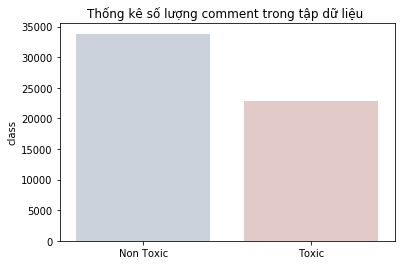

In [0]:
#Trực quan hóa tập dữ liệu đầu vào
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(['Non Toxic', 'Toxic'], data['class'].map({0:"Non Toxic", 1: "Toxic"}).value_counts(), alpha=0.8,palette="vlag")
plt.title('Thống kê số lượng comment trong tập dữ liệu ')
plt.grid=True

In [0]:
data.loc[[56000],['tweet']]

,tweet
56000,fabric doll handmade stuffed doll #tilda #doll...


# II.TIỀN XỬ LÝ DỮ LIỆU
---

Sử dụng thư viện Natural Language Tool Kit (NLTK) thực hiện xử lý các comment

NLTK là một bộ công cụ dành riêng cho Natural Language Processing và được tích hợp vào Python. Nó đang ngày càng hoàn thiện và tích hợp các công cụ mới bởi hàng nghìn lập trình viên và cộng tác viên trên khắp thế giới. NLTK bao gồm những thư viện hàm, các công cụ phân tích, các corpus, wordnet, …giúp đơn giản hóa, tiết kiệm thời gian và công sức cho các lập trình viên. Python kết hợp với NLTK là bộ công cụ hữu hiệu và mạnh mẽ nhất dành cho Natural Language Processing.

http://www.nltk.org/


In [0]:
#Khai báo sử dụng thư viện NLTK

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

###2.1) Làm sạch dữ liệu
----
Mục đích bước này là loại bỏ noise trong data của bạn. Đa phần noise là các thẻ HTML, JavaScript, và đương nhiên nếu cứ để noise để tiến hành xử lý sẽ dẫn đến kết quả xử lý không tốt.

Thư viện re — Regular expression operations: thao tác với biểu thức chính quy

https://regex101.com/

In [0]:
#Thư viện re — Regular expression operations: thao tác với biểu thức chính quy
import re


#hàm decontracted thực hiện chuyển đổi các phần viết tắt thành câu đầy đủ
def decontracted(st):
    # specific
    st = re.sub(r"won\'t", "will not", st)
    st = re.sub(r"can\'t", "can not", st)
    # general
    st = re.sub(r"n\'t", " not", st)
    st = re.sub(r"\'re", " are", st)
    st = re.sub(r"\'s", " is", st)
    st = re.sub(r"\'d", " would", st)
    st = re.sub(r"\'ll", " will", st)
    st = re.sub(r"\'ve", " have", st)
    st = re.sub(r"\'m", " am", st)
    return st

#hàm clear_link thực hiện loại bỏ liên kết (link), địa chỉ email trong câu
def clear_link(st):
    #Remove links/email
    word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', 
                '', st, flags=re.MULTILINE)
    word = re.sub(r'(@[^\s]*)', "", word)
    #word = re.sub('[\W]', ' ', st)
    return word

#Hàm clear_punctuation thực hiện loai bỏ các dấu câu, ký tự đặc biệt trong chuỗi
def clear_punctuation(st):
    word = re.sub(r'[^\w\s]', '',st)
    return word

#Hàm clear_special loại bỏ các ký tự chỉ để lại các ký tự chữ a-z, A-Z
def clear_special(st):
    word = re.sub('[^a-zA-Z]', ' ', st)
    return word


#Hàm clear_noise kết hợp sử dụng các hàm ở trên để xử lý chuỗi
def clear_noise(word):
    word = word.lower()         # chuyển toàn bộ sang chữ thường để xử lý
    word = decontracted(word)
    word = clear_link(word)
    word = clear_punctuation(word)
    word = clear_special(word)
    return word

In [0]:
#Kiểm tra việc xử lý với các hàm đã xây dựng

text = """I won't give up @nam to learn English 123; dangnam1985@gmail.com - http://dantri.com.vn, i am going to visited Ha Long bay (^.^); he had gone aboard for 2 years"""
print(text)

#text1 = decontracted(text)
#text1 =clear_link(text)
#text1 = clear_punctuation(text)
#text1 = clear_special(text)
text1 = clear_noise(text)

print(text1)

I won't give up @nam to learn English 123; dangnam1985@gmail.com - http://dantri.com.vn, i am going to visited Ha Long bay (^.^); he had gone aboard for 2 years
i will not give up  to learn english        i am going to visited ha long bay  he had gone aboard for   years


###2.2) Loại bỏ stopword
---

StopWords là những từ xuất hiện nhiều trong ngôn ngữ tự nhiên, tuy nhiên lại không mang nhiều ý nghĩa. Ở tiếng việt StopWords là những từ như: để, này, kia... Tiếng anh là những từ như: is, that, this... Tham khảo thêm tại danh sách stopwords trong tiếng việt

Có rất nhiều cách để loại bỏ StopWords nhưng có 2 cách chính là:

* Dùng từ điển

* Dựa theo tần suất xuất hiện của từ

In [0]:
#stopwords là những từ xuất hiện nhiều trong văn bản, nhưng ko có ý nghĩa 
#Load danh sách Stopword trong tiếng anh

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
#Hiển thị danh sách các stopwords trong tiếng anh
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [0]:
#hàm clear_stopwords loai bỏ các từ stopword trong câu
def clear_stopwords(st):
    word = " ".join(st for st in st.split() if st not in stop)
    return word

In [0]:
print(text1)
text2 = clear_stopwords(text1)
print(text2)

i will not give up  to learn english        i am going to visited ha long bay  he had gone aboard for   years
give learn english going visited ha long bay gone aboard years


###2.3) Chuẩn hóa từ (Stemming và Lemmatization)
---
Trong quá trình xử lý ngôn ngữ tự nhiên, chúng ta sẽ có nhu cầu so sánh các từ (token) với nhau. Việc so sánh này tưởng chừng như đơn giản là lấy 2 chuỗi ký tự và dùng phép “==” để kiểm tra, nhưng thực tế thì không phải là như vậy. Đối với một số ngôn ngữ, tiêu biểu là tiếng Anh, mỗi từ có thể có nhiều biến thể khác nhau. Điều này làm cho việc so sánh giữa các từ là không thể mặc dù về mặc ý nghĩa cơ bản là như nhau. Ví dụ các từ “walks“, “walking“, “walked” đều là các biến thể của từ “walk” và đều mang ý nghĩa là “đi bộ”. Vậy làm sao để so sánh các từ như thế với nhau? Lemmatization và Stemming chính là 2 kỹ thuật thường được dùng cho việc này.

Stemming là kỹ thuật dùng để biến đổi 1 từ về dạng gốc (được gọi là stem hoặc root form) bằng cách cực kỳ đơn giản là loại bỏ 1 số ký tự nằm ở cuối từ mà nó nghĩ rằng là biến thể của từ. Ví dụ như chúng ta thấy các từ như walked, walking, walks chỉ khác nhau là ở những ký tự cuối cùng, bằng cách bỏ đi các hậu tố –ed, –ing hoặc –s, chúng ta sẽ được từ nguyên gốc là walk. Người ta gọi các bộ xử lý stemming là Stemmer.

Bởi vì nguyên tắc hoạt động của stemmer rất là đơn giản như vậy cho nên tốc độ xử lý của nó rất là nhanh, và kết quả stem đôi khi không được như chúng ta mong muốn. Chẳng hạn như từ goes sẽ được stem thành từ goe (bỏ chữ s cuối từ) trong khi đó stem của từ go vẫn là go, kết quả là 2 từ “goes” và “go” sau khi được stem thì vẫn không giống nhau. Một nhược điểm khác là nếu các từ dạng bất quy tắt như went hay spoke thì stemmer sẽ không thể đưa các từ này về dạng gốc là go hay speak.

Tuy có các nhược điểm như trên nhưng trong thực tế Stemming vẫn được sử dụng khá phổ biến trong NLP vì nó có tốc độ xử lý nhanh và kết quả cuối cùng nhìn chung không hề tệ khi so với Lemmatization.

In [0]:
from nltk.stem import WordNetLemmatizer
wn = WordNetLemmatizer()
import string
my_sw = ['rt', 'ht', 'fb', 'amp', 'gt']

def black_txt(token):
  if token == 'u':
    token = 'you'
  return  token not in stop and token not in list(string.punctuation) and token not in my_sw


def fun_stemlem(word):
  list_word_clean = []
  for w1 in word.split(" "):
    if  black_txt(w1.lower()):
      word_lemma =  wn.lemmatize(w1,  pos="v")
      list_word_clean.append(word_lemma)

  #Cleaning, lowering and remove whitespaces
  word = " ".join(list_word_clean)
  return word 

In [0]:
st1 = data.iloc[2000]['tweet']
st1

'&amp; my sister is really going to fucken deny it but yet sprays the room with febreeze , like really bitch why are you going to deny it'

In [0]:
sta = clear_noise(st1)
stb = clear_stopwords(sta)
stc = fun_stemlem(stb)
print(stc)   

sister really go fucken deny yet spray room febreeze like really bitch go deny


### 2.4) Tiền Xử lý dữ liệu với các hàm đã xây dựng
---


In [0]:
def prepare_data(word):
    word = clear_noise(word)        #Loại bỏ nhiễu trong các comment
    word = clear_stopwords(word)    #Loại bỏ stopword trong các comment
    word = fun_stemlem(word)        #Chuẩn hóa comment
    return word
    

In [0]:
print('Raw text:',text)
print('New Text:',prepare_data(text))

Raw text: I won't give up @nam to learn English 123; dangnam1985@gmail.com - http://dantri.com.vn, i am going to visited Ha Long bay (^.^); he had gone aboard for 2 years
New Text: give learn english go visit ha long bay go aboard years


In [0]:
#Hiển thị danh sách các từ trước và sau khi chuẩn hóa để test
for idx in data[30090:30100].index:
  print(idx, '\n', data.iloc[idx]['tweet'],'\n',prepare_data(data.iloc[idx]['tweet']))
  print("************")

30090 
 i'm so #loyal. sucks when it's not reciprocated. #bummed   
 loyal suck reciprocate bum
************
30091 
  @user plz don't u dare forget @user majority @user vote against #gunsense bills 4 @user long $$! @user @user  
 plz dare forget majority vote gunsense bill long
************
30092 
 beð ð@user @user @user @user @user @user @user @user @user @user 
 
************
30093 
 âhappiness often sneaks in through a door you didn't know you left open.â john barrymore #live #life #happiness   #open 
 happiness often sneak door know leave open john barrymore live life happiness open
************
30094 
 its the hae tym u knw that life is sho no matter how old u r live life to the fullest! #self-acceptance  #life   #knowyourboundaries 
 hae tym knw life sho matter old r live life fullest selfacceptance life knowyourboundaries
************
30095 
  â #australia unemployment rate s.a. in line with expectations (5.7%) in may   #blog #silver #gold #forex 
 australia unemploy

In [0]:
#LÀM SẠCH TOÀN BỘ TẬP DỮ LIỆU
#----------------------------------------------------------------------------------------------------------
#Tạo dataframe data_new, bổ sung thêm field: tweet_ok là comment đã được tiền xử lý dữ liệu tương ứng
data_new = data.copy()
data_new['tweet_ok'] = data['tweet'].apply(lambda x: prepare_data(x))

In [0]:
data_new.head(10)
#data.head(10)

,class,tweet,tweet_ok
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean house man always take trash
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats dwn bad cuffin dat hoe st place
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confuse shit
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch tell ya
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit blow faithful somebody still fuck hoe
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",sit hate another bitch get much shit go
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause tire big bitch come us skinny girls
8,1,""" &amp; you might not get ya bitch back &amp; ...",might get ya bitch back thats
9,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fight mariam bitch


### 2.6) Lưu kết quả đã xử lý ra file
---

Sau khi tiền xử lý dữ liệu, có một số comment bị xóa toàn bộ các noise, trở thành các comment rỗng.
Thực hiện loại bỏ các Comment này ra khỏi tập dữ liệu.

In [0]:
data_finish = data_new[['class','tweet_ok']]
data_finish.head(10)

,class,tweet_ok
0,0,woman complain clean house man always take trash
1,1,boy dats dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confuse shit
3,1,look like tranny
4,1,shit hear might true might faker bitch tell ya
5,1,shit blow faithful somebody still fuck hoe
6,1,sit hate another bitch get much shit go
7,1,cause tire big bitch come us skinny girls
8,1,might get ya bitch back thats
9,1,hobbies include fight mariam bitch


In [0]:
#Ví dụ: Trường hợp sau khi tiền xử lý dữ liệu, còn lại chuỗi rỗng
print(data_new.iloc[30092])
print('---------------------------------')
print(data_new.iloc[32005])


class                                                       0
tweet       beð ð@user @user @user @user @user @user...
tweet_ok                                                     
Name: 30092, dtype: object
---------------------------------
class                             0
tweet       be   with who you are! 
tweet_ok                           
Name: 32005, dtype: object


In [0]:
#Lưu kết quả sau khi đã xử lý ra file .csv
#File data_finish.csv chỉ lưu trữ 2 thuộc tính: class - tweet_ok (đã xử lý)
data_finish.to_csv('data_finish.csv',index=None, header=True)


#File data_all.csv Lưu trữ 3 thuộc tính: class - tweet (gốc) - tweet_ok (đã xử lý)
data_new.to_csv('data_all.csv',index=None, header=True)

# III) SỬ DỤNG MÔ HÌNH HỌC MÁY TRONG PHÂN LỚP VĂN BẢN
---


## III.1) Word Embedding
---
Khi huấn luyện mô hình máy học để xử lý ngôn ngữ tự nhiên, thì chắc chắn dữ liệu bạn có ở dạng chữ viết, sự thật là bạn không thể đem trực tiếp dữ liệu chữ viết thô vào để huấn luyện mô hình máy học ngay được, bởi vì các mô hình máy học chỉ làm việc được trên những con số, hay chính xác hơn là tính toán trên các ma trận, véc-tơ số.

Điều này dẫn đến việc bạn phải nghĩ cách làm thế nào đó để chuyển dữ liệu chữ viết thô thành dữ liệu số thực, sau đó mới có thể đưa dữ liệu số thực này vào các mô hình học được, có rất nhiều kĩ thuật để làm việc này và gọi chung chúng là kĩ thuật Embedding.

Đó chỉ mới là ý tưởng của kĩ thuật Embedding, còn việc chuyển từ không gian này sang một không gian vec-tơ khác bạn không thể làm tùy tiện được mà phải đảm bảo:

* Không gian véc-tơ mới (hay véc-tơ số thực) phải thể hiện được bản chất của tập dữ liệu ban đầu (dữ liệu chữ viết).
* Cực tiểu hóa lượng mất mát thông tin xảy ra khi bạn chuyển sang không gian mới.

Một số kĩ thuật Embedding được sử dụng phổ biến như mạng Neural Network, PCA (Principal Component Analysis) gọi là kĩ thuật phân tích thành phần chính, TF-IDF, Bag of Word, Encoder-Decoder sử dụng trong RNN (Recurrent Neural Network) hoặc LSTM (Long-Short Term Memory), ...v.v.

Một số thư viện sử dụng kĩ thuật Embedding như sklearn, Word2vec, FastText, ...v.v.

**Word Embedding** là tên gọi chung của các mô hình ngôn ngữ và các phương pháp học theo đặc trưng trong Xử lý ngôn ngữ tự nhiên(NLP), ở đó các từ hoặc cụm từ được ánh xạ sang các vector số (thường là số thực). Đây là một công cụ đóng vai trò quan trọng đối với hầu hết các thuật toán, kiến trúc Machine Learning, Deep Learning trong việc xử lý Input ở dạng text, do chúng chỉ có thể hiểu được Input ở dạng là số, từ đó mới thực hiện các công việc phân loại, hồi quy,vv…

Word Embedding được phân chủ yếu thành 2 loại:

* Frequency-based embedding.
* Prediction-based embedding.

### 3.1) Chuẩn bị tập dữ liệu cho việc trích chọn đặc trưng

#### a) Tải tập dữ liệu đã xử lý
---
Thực hiện tải tập dữ liệu data_finish.csv đã được xử lý ở trên để thực hiện vector hóa.

In [0]:
#Tải file dữ liệu sau khi đã tiền xử lý
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path='/content/drive/My Drive/Colab Notebooks/10Project/Data_tweet/data_finish.csv'
#data_finish = pd.read_csv(path,encoding ='latin1')
data_finish = pd.read_csv(path)
data_finish.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,class,tweet_ok
0,0,woman complain clean house man always take trash
1,1,boy dats dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confuse shit
3,1,look like tranny
4,1,shit hear might true might faker bitch tell ya
5,1,shit blow faithful somebody still fuck hoe
6,1,sit hate another bitch get much shit go
7,1,cause tire big bitch come us skinny girls
8,1,might get ya bitch back thats
9,1,hobbies include fight mariam bitch


#### b) Loại bỏ một số dữ liệu bị rỗng sau khi tiền xử lý
---
Sau khi thực hiện việc làm sạch dữ liệu, có một số dòng dữ liệu bị rỗng, cần phải loại bỏ các dòng dữ liệu này trước khi thực hiện chuyển về dạng số.

In [0]:
#Thống kê số row null trong tập dữ liệu:
data_finish.isnull().sum()

class        0
tweet_ok    43
dtype: int64

In [0]:
data_finish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56700 entries, 0 to 56699
Data columns (total 2 columns):
class       56700 non-null int64
tweet_ok    56657 non-null object
dtypes: int64(1), object(1)
memory usage: 886.0+ KB


In [0]:
#Liệt kê chi tiết các row null
data_finish[pd.isnull(data_finish).any(axis=1)]

,class,tweet_ok
2637,1,NaN
4828,0,NaN
6098,1,NaN
6613,1,NaN
25441,0,NaN
26744,0,NaN
28134,0,NaN
28765,0,NaN
29194,0,NaN
29582,0,NaN


In [0]:
#Thực hiện xóa tất cả các row có phần tử NaN
data_finish = data_finish.dropna()

In [0]:
#Lưu dữ liệu sau khi đã loại bỏ các dòng trống
#File data_finish_no_null.csv Lưu trữ 2 thuộc tính: class - tweet_ok
data_finish.to_csv('data_finish_no_null.csv',index=None, header=True)

#### c) Tách thành tập Train - Test
---


In [0]:
#------------NẾU CẦN ----------------------------------------------------
#Đọc lại tập dữ liệu sau khi đã loại bỏ dòng rỗng:
#Tải file dữ liệu sau khi đã tiền xử lý

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path='/content/drive/My Drive/Colab Notebooks/10Project/Data_tweet/data_finish_no_null.csv'
data_NLP = pd.read_csv(path)
data_NLP.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,class,tweet_ok
0,0,woman complain clean house man always take trash
1,1,boy dats dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confuse shit
3,1,look like tranny
4,1,shit hear might true might faker bitch tell ya
5,1,shit blow faithful somebody still fuck hoe
6,1,sit hate another bitch get much shit go
7,1,cause tire big bitch come us skinny girls
8,1,might get ya bitch back thats
9,1,hobbies include fight mariam bitch


In [0]:
#THỰC HIỆN TÁCH TẬP DỮ LIỆU THÀNH TẬP TRAIN VÀ TEST
from sklearn import model_selection
#Tách tập dữ liệu thành Train - Test (tỷ lệ: 0.8 - 0.2)
train_x,test_x,train_y,test_y=model_selection.train_test_split(data_NLP['tweet_ok'],data_NLP['class'],test_size=0.2)

print('Tập Train (80%): ', train_x.shape)
print('Tập Test (20%): ', test_x.shape)

Tập Train (80%):  (45325,)
Tập Test (20%):  (11332,)


### 3.2) Tính đặc trưng theo TF-IDF
----
Viết tắt của thuật ngữ tiếng Anh term frequency – inverse document frequency,tf-idf là trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản.

**Các tính trọng số TF-IDF:**
* Tf- term frequency : dùng để ước lượng tần xuất xuất hiện của từ trong văn bản. Tuy nhiên với mỗi văn bản thì có độ dài khác nhau, vì thế số lần xuất hiện của từ có thể nhiều hơn . Vì vậy số lần xuất hiện của từ sẽ được chia độ dài của văn bản (tổng số từ trong văn bản đó)

    * TF(t, d) = (số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d)

* IDF- Inverse Document Frequency: dùng để ước lượng mức độ quan trọng của từ đó như thế nào . Khi tính tần số xuất hiện tf thì các từ đều được coi là quan trọng như nhau. Tuy nhiên có một số từ thường được được sử dụng nhiều nhưng không quan trọng để thể hiện ý nghĩa của đoạn văn. Vì vậy ta cần giảm đi mức độ quan trọng của những từ đó bằng cách sử dụng IDF :

    * IDF(t, D) = log_e( Tổng số văn bản trong tập mẫu D/ Số văn bản có chứa từ t )


In [0]:
# Tính TF-IDF cho tập dữ liệu
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text

#Convert a collection of raw documents to a matrix of TF-IDF features.

vector = TfidfVectorizer(analyzer='word', max_features=15000, stop_words = 'english')

vector.fit(data_NLP['tweet_ok'])
xtrain_tfidf = vector.transform(train_x)
xtest_tfidf = vector.transform(test_x)
xtrain_tfidf.data
     

array([0.42380266, 0.47214547, 0.2228723 , ..., 0.4050343 , 0.33295781,
       1.        ])

In [0]:
print(xtrain_tfidf[100].data)
print(xtrain_tfidf.data.shape)

[0.6268216  0.28654892 0.36342687 0.6268216 ]
(264965,)


### 3.3) Đặc trưng Bag of Word
---

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
xtrain_bow=cv.fit_transform(train_x)
#transformed test reviews
xtest_bow=cv.transform(test_x)

In [0]:
print('BOW_cv_train:',xtrain_bow.shape)
print('BOW_cv_test:',xtest_bow.shape)

BOW_cv_train: (45325, 404448)
BOW_cv_test: (11332, 404448)


In [0]:
for i in range(10000,10010):
    print(xtrain_bow[i].data)

[1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1 1]
[1 1 1]
[1 1]
[]
[1 1 1 1 1 1 1 1 1]
[1 1]
[1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## III.2) Sử dụng học máy để phân lớp văn bản
---
Áp dụng một số thuật toán học máy trong phân lớp văn bản [toxic - non toxic]
* Navie Bayes
* SVM
* KNN

### 1) Thuật toán Naive Bayes
---
* Naive Bayes Classifiers (NBC) thường được sử dụng trong các bài toán Text Classification
* NBC có thời gian training và test rất nhanh. Điều này có được là do giả sử về tính độc lập giữa các thành phần, nếu biết class.

* Nếu giả sử về tính độc lập được thoả mãn (dựa vào bản chất của dữ liệu), NBC được cho là cho kết quả tốt hơn so với SVM và logistic regression khi có ít dữ liệu training.

* NBC có thể hoạt động với các feature vector mà một phần là liên tục (sử dụng Gaussian Naive Bayes), phần còn lại ở dạng rời rạc (sử dụng Multinomial hoặc Bernoulli).

* Khi sử dụng Multinomial Naive Bayes, Laplace smoothing thường được sử dụng để tránh trường hợp 1 thành phần trong test data chưa xuất hiện ở training data.

#### a) Sử dụng NB với TF-IDF

In [0]:
#Sử dụng mô hình Naive Bayes với TF-IDF
from sklearn import naive_bayes as nb
#from sklearn.naive_bayes import MultinomialNB  as multiNB
MultiNB = nb.MultinomialNB(alpha=0.75)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB.fit(xtrain_tfidf,train_y)

#Đánh giá độ chính xác của mô hình trên tập Test
acc_MultiNB = round(MultiNB.score(xtest_tfidf, test_y) * 100, 2)

print('Độ chính xác của mô hình: ', acc_MultiNB, '%')
print(MultiNB)

Độ chính xác của mô hình:  91.07 %
MultinomialNB(alpha=0.75, class_prior=None, fit_prior=True)


#### b) Sử dụng NB với BoW
---
Mô hình này được áp dụng cho các loại dữ liệu mà mỗi thành phần là một giá trị binary - bẳng 0 hoặc 1. Ví dụ: cũng với loại văn bản nhưng thay vì đếm tổng số lần xuất hiện của 1 từ trong văn bản, ta chỉ cần quan tâm từ đó có xuất hiện hay không.

In [0]:
#Sử dụng mô hình Naive Bayes với Bag of words
from sklearn import naive_bayes as nb

MultiNB = nb.MultinomialNB(alpha=0.75)

#huấn luyện mô hình với tập huấn luyện Train
MultiNB.fit(xtrain_bow,train_y)

#Đánh giá độ chính xác của mô hình trên tập Test
acc_MultiNB = round(MultiNB.score(xtest_bow, test_y) * 100, 2)
print('Độ chính xác của mô hình NB: ', acc_MultiNB, '%')
print(MultiNB)

Độ chính xác của mô hình:  72.21 %
MultinomialNB(alpha=0.75, class_prior=None, fit_prior=True)


### 2)Thuật toán SVM

#### a) Sử dụng SVM với TF-IDF
---

In [0]:
from sklearn.svm import SVC

svm_tfidf = SVC(C=0.5, gamma='auto')
#Huấn luyện mô hình với dữ liệu Train:
svm_tfidf.fit(xtrain_tfidf, train_y)

#Xác định độ chính xác của mô hình trên tập Train:
acc_svm_tfidf= round(svm_tfidf.score(xtest_tfidf, test_y) * 100, 2)

print("Độ chính xác của mô hình SVM (TF-IDF): ", acc_svm_tfidf, "%")
print("Các tham số của model SVM:\n",svm_tfidf)

Độ chính xác của mô hình SVM (TF-IDF):  59.29 %
Các tham số của model SVM:
 SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### b) Sử dụng SVM với BoW
---

In [0]:
from sklearn.svm import SVC

svm_bow = SVC(C=0.5,gamma='auto')

#Huấn luyện mô hình với dữ liệu Train:
svm_bow.fit(xtrain_bow,train_y)

#Xác định độ chính xác của mô hình trên tập Train:
acc_svm_bow = round(svm_bow.score(xtest_bow, test_y) * 100, 2)

print("Độ chính xác của mô hình SVC (BoW): ", acc_svm_bow, "%")
print("Các tham số của model SVM:\n",svm_bow)

Độ chính xác của mô hình SVC (BoW):  59.29 %
Các tham số của model SVM:
 SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### 3) Thuật toán KNN
---

#### a) Sử dụng KNN với TF-IDF

In [0]:
from sklearn.neighbors import KNeighborsClassifier
#Khởi tạo biến knn sử dụng thuật toán phân lớp KNN, với n = 3
knn_tfidf = KNeighborsClassifier(n_neighbors = 10)

#Huấn luyện mô hình với tập dữ liệu train:
knn_tfidf.fit(xtrain_tfidf, train_y)

#Đánh giá độ chính xác của mô hình trên tập test:
acc_knn_tfidf = round(knn_tfidf.score(xtest_tfidf, test_y) * 100, 2)

print("Độ chính xác của mô hình KNN (TF-IDF): ", acc_knn_tfidf, "%")
print("Các tham số của Model KNN: \n",knn_tfidf)

Độ chính xác của mô hình KNN (TF-IDF):  67.91 %
Các tham số của Model KNN: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


#### b) Sử dụng KNN với BoW

In [0]:
from sklearn.neighbors import KNeighborsClassifier
#Khởi tạo biến knn sử dụng thuật toán phân lớp KNN, với n = 3
knn_bow = KNeighborsClassifier(n_neighbors = 10)

#Huấn luyện mô hình với tập dữ liệu train:
knn_bow.fit(xtrain_tfidf, train_y)

#Đánh giá độ chính xác của mô hình trên tập test:
acc_knn_bow = round(knn_bow.score(xtest_tfidf, test_y) * 100, 2)

print("Độ chính xác của mô hình KNN (BoW): ", acc_knn_bow, "%")
print("Các tham số của Model KNN: \n",knn_bow)

Độ chính xác của mô hình KNN (BoW):  67.91 %
Các tham số của Model KNN: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


## IV) SỬ DỤNG MÔ HÌNH HỌC SÂU - LSTM TRONG PHÂN LỚP VĂN BẢN
---
Sử dụng mạng LTSM phân lớp văn bản.

![alt text](https://miro.medium.com/max/989/1*8BdmU3wYefT7vDZRWWOL1Q.png)


In [0]:
#------------NẾU CẦN ----------------------------------------------------
#Đọc lại tập dữ liệu sau khi đã loại bỏ dòng rỗng:
#Tải file dữ liệu sau khi đã tiền xử lý

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path='/content/drive/My Drive/Colab Notebooks/10Project/Data_tweet/data_finish_no_null.csv'
data_NLP = pd.read_csv(path)
data_NLP.head(10)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


,class,tweet_ok
0,0,woman complain clean house man always take trash
1,1,boy dats dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confuse shit
3,1,look like tranny
4,1,shit hear might true might faker bitch tell ya
5,1,shit blow faithful somebody still fuck hoe
6,1,sit hate another bitch get much shit go
7,1,cause tire big bitch come us skinny girls
8,1,might get ya bitch back thats
9,1,hobbies include fight mariam bitch



#### Thư viện Spacy:
---
SpaCy là một thư viện xử lý ngôn ngữ tự nhiên với các ví dụ tuyệt vời, tài liệu API và các ứng dụng demo. Thư viện được viết bằng ngôn ngữ Cython là phần mở rộng C của Python. Một tính năng tuyệt vời khác của spaCy là một kiến trúc được thiết kế để xử lý toàn bộ tài liệu mà không cần phải chia tài liệu thành các cụm từ. spaCy chứa các mô hình thống kê được huấn luyện trước và vector từ vựng (word vector), và cũng hỗ trợ việc token hóa cho hơn 49 ngôn ngữ. Tính năng đáng chú ý của spaCy là tốc độ xử lý nhanh trong các mô hình mạng thần kinh tích chập dùng để gắn thẻ, phân tích cú pháp và nhận dạng thực thể được đặt tên và dễ dàng tích hợp học sâu (deep learning)
https://spacy.io/.

In [0]:
#
import spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 65.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=fac4f55843ba637cf39dfe9643d17dca324063d8bd3ecb74ab38a1e23cb674c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-hswcfkl_/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
nlp = spacy.load('/usr/local/lib/python3.6/dist-packages/en_core_web_lg/en_core_web_lg-2.1.0')

In [0]:
text = "Amazon.com, Inc., doing business as Amazon, is an American electronic commerce and cloud computing company based in Seattle, Washington, that was founded by Jeff Bezos on July 5, 1994. The tech giant is the largest Internet retailer in the world as measured by revenue and market capitalization, and second largest after Alibaba Group in terms of total sales. The amazon.com website started as an online bookstore and later diversified to sell video downloads/streaming, MP3 downloads/streaming, audiobook downloads/streaming, software, video games, electronics, apparel, furniture, food, toys, and jewelry. The company also produces consumer electronics - Kindle e-readers, Fire tablets, Fire TV, and Echo - and is the world's largest provider of cloud infrastructure services (IaaS and PaaS). Amazon also sells certain low-end products under its in-house brand AmazonBasics."
text1="New York is the biggest city on the world"
### Parse the text with spaCy
### Our 'document' variable now contains a parsed version of text.
document = nlp(text1)
### print out all the named entities that were detected
for entity in document.ents:
      print(entity.text, entity.label_) 

New York GPE


In [0]:
#xây dựng một bảng tương ứng, mà mỗi từ khác nhau sẽ được ký hiệu bởi số nguyên khác nhau duy nhất.
#Keras hỗ trợ trong việc xây dựng bảng này với hàm: Keras.preprocessing.Text.Tokenizer
from keras.preprocessing.text import Tokenizer
import numpy as np

tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(data_NLP['tweet_ok'])
embeddings_index = np.zeros((30000 + 1, 300))
for word, idx in tokenizer.word_index.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass

In [0]:
embeddings_index.shape
embeddings_index[10]

(30001, 300)

#### a) Chuẩn bị tập Train/Test
---


In [0]:
#Lấy dữ liệu 
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
X=data_NLP['tweet_ok']
y=data_NLP['class']

encoder = LabelEncoder()
y=encoder.fit_transform(y)
Y=np_utils.to_categorical(y)

In [0]:
print(type(Y))
print(Y)
print(Y.shape)
print(y)
print(y.shape)

<class 'numpy.ndarray'>
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(56657, 2)
[0 1 1 ... 0 0 0]
(56657,)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 40, stratify=Y)
print('Tập Train (80%): ', x_train.shape)
print('Tập Test (20%): ', x_test.shape)

Tập Train (80%):  (45325,)
Tập Test (20%):  (11332,)


#### b)Xây dựng model
---

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Embedding
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


In [0]:
class KerasTextClassifier(BaseEstimator, TransformerMixin):
  '''Wrapper class for keras text classification models that takes raw text as input.'''
  
  def __init__(self, max_words=30000, input_length=20, emb_dim=300, n_classes=2, epochs=40, batch_size=64, emb_idx=0):
    self.max_words = max_words
    self.input_length = input_length
    self.emb_dim = emb_dim
    self.n_classes = n_classes
    self.epochs = epochs
    self.bs = batch_size
    self.embeddings_index = emb_idx
    self.tokenizer = Tokenizer(num_words=self.max_words+1, lower=True, split=' ')
    self.model = self._get_model()
    return self.model.summary()
    
  def _get_model(self):
    input_text = Input((self.input_length,))
    text_embedding = Embedding(input_dim=self.max_words+1, output_dim=self.emb_dim, input_length=self.input_length, 
                               mask_zero=False, weights=[self.embeddings_index], trainable=False)(input_text)
    
    
    text_embedding = SpatialDropout1D(0.4)(text_embedding)
    bilstm =(LSTM(units=50,  recurrent_dropout=0.2, return_sequences = True))(text_embedding)
    x = Dropout(0.2)(bilstm)
    x =(LSTM(units=50,  recurrent_dropout=0.2))(x)
    out = Dense(units=self.n_classes, activation="softmax")(x)
    model = Model(inputs=[input_text],outputs=[out])
    model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])
    return model
  
  def _get_sequences(self, texts):
    seqs = self.tokenizer.texts_to_sequences(texts)
    return pad_sequences(seqs, maxlen=self.input_length, value=0)
  
  def _preprocess(self, texts):
    return [prepare_data(x) for x in texts]
  
  def fit(self, X, y):
    '''Fit the vocabulary and the model.
       :params: X: list of texts. y: labels.
    '''
    self.tokenizer.fit_on_texts(X)
    self.tokenizer.word_index = {e: i for e,i in self.tokenizer.word_index.items() if i <= self.max_words}
    self.tokenizer.word_index[self.tokenizer.oov_token] = self.max_words + 1
    seqs = self._get_sequences(self._preprocess(X))
    self.model.fit([seqs ], y, batch_size=self.bs, epochs=self.epochs, validation_split=0.1)
  
  #Hàm predict_proba cho biết xác xuất dự đoán comment thuộc lớp nào
  def predict_proba(self, X, y=None):
    seqs = self._get_sequences(self._preprocess(X))
    return self.model.predict(seqs)
  
  #Hàm predict: chuyển đổi về class có tỷ lệ dự đoán cao nhất
  def predict(self, X, y=None):
    return np.argmax(self.predict_proba(X), axis=1)
  
  def score(self, X, y):
    y_pred = self.predict(X)
    return accuracy_score(np.argmax(y, axis=1), y_pred)

In [0]:
#Khai báo sử dung Model
text_model = KerasTextClassifier(emb_idx= embeddings_index)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 20)                0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 20, 300)           9000300   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 20, 300)           0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 20, 50)            70200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102 

### c)Huấn luyện mô hình
---


In [0]:
text_model.fit(x_train,y_train)

Train on 40792 samples, validate on 4533 samples
Epoch 1/40
40792/40792 [==============================] - 37s 905us/step - loss: 0.3256 - acc: 0.8722 - val_loss: 0.2434 - val_acc: 0.9080
Epoch 2/40
40792/40792 [==============================] - 35s 862us/step - loss: 0.2426 - acc: 0.9128 - val_loss: 0.1973 - val_acc: 0.9314
Epoch 3/40
40792/40792 [==============================] - 35s 866us/step - loss: 0.2115 - acc: 0.9245 - val_loss: 0.1847 - val_acc: 0.9367
Epoch 4/40
40792/40792 [==============================] - 35s 855us/step - loss: 0.1921 - acc: 0.9317 - val_loss: 0.1684 - val_acc: 0.9433
Epoch 5/40
40792/40792 [==============================] - 35s 856us/step - loss: 0.1806 - acc: 0.9357 - val_loss: 0.1692 - val_acc: 0.9446
Epoch 6/40
40792/40792 [==============================] - 35s 865us/step - loss: 0.1699 - acc: 0.9405 - val_loss: 0.1627 - val_acc: 0.9460
Epoch 7/40
40792/40792 [==============================] - 35s 860us/step - loss: 0.1648 - acc: 0.9415 - val_loss: 0.1

### d) Đánh giá độ chính xác của mô hình trên tập test
---


In [0]:
acc_LSTM = text_model.score(x_test, y_test)
print("Độ chính xác của mô hình LSTM: ", round(acc_LSTM*100,2), "%")

Độ chính xác của mô hình LSTM:  94.67 %


In [0]:
#Dự đoán với tập test
a = text_model.predict_proba(x_test)
b = text_model.predict(x_test)
for i in range(1,10):
    print(a[i],'--',b[i])


[6.2105624e-04 9.9937892e-01] -- 1
[0.00649963 0.9935003 ] -- 1
[0.998662   0.00133796] -- 0
[0.9988085  0.00119151] -- 0
[0.8254765 0.1745235] -- 0
[0.9637988  0.03620114] -- 0
[0.8927987  0.10720136] -- 0
[9.9998343e-01 1.6516107e-05] -- 0
[0.9978721  0.00212794] -- 0


## V)THƯ VIỆN ELI5
---
ELI5 là một gói thư viện của Python trợ giúp việc gỡ lỗi các mô hình học máy cho bài toán phân lớp và hỗ trợ giải thích các dự đoán. ELI5 cũng thực hiện một số thuật toán để kiêm tra các mô hình hộp đen. 

https://eli5.readthedocs.io/en/latest/overview.html

In [0]:
!pip install eli5

     |████████████████████████████████| 112kB 3.5MB/s 


In [0]:
for i in range(0,100):
    print(i,')',y_test[i],'--',x_test.iloc[i])


In [0]:
import eli5
from eli5.lime import TextExplainer
from IPython.display import display, HTML

for idx in x_test.index[300:320]:
  te = TextExplainer(random_state=42)
  te.fit(prepare_data(x_test[idx]), text_model.predict_proba, )
  print(idx)
  print("Real Class:",  ["Non Toxic" if x == 0 else "Toxic" for x in [data_NLP.iloc[idx]['class']]])
  print("Text Tweet:", data_NLP.iloc[idx]['tweet_ok'])
  print("ELI5 Predicted Class:")
  HTML(display((te.show_prediction(target_names=[ 'Non Toxic','Toxic',]))))
 

21440
Real Class: ['Toxic']
Text uncleaned tweet: deal breaker yo pussy smell like sweaty hoop short
ELI5 Predicted Class:


53211
Real Class: ['Non Toxic']
Text uncleaned tweet: finally find way delete old tweet might find useful well deletetweets
ELI5 Predicted Class:


20085
Real Class: ['Toxic']
Text uncleaned tweet: yeah check connection fuck wifi check lil bitch nigga
ELI5 Predicted Class:


18063
Real Class: ['Toxic']
Text uncleaned tweet: keep stoop hoe know better
ELI5 Predicted Class:


37531
Real Class: ['Non Toxic']
Text uncleaned tweet: great time vacation barharbor soybu fitmom momlife maine
ELI5 Predicted Class:


9200
Real Class: ['Non Toxic']
Text uncleaned tweet: friends let friends become guidos themoreyouknow
ELI5 Predicted Class:


15790
Real Class: ['Toxic']
Text uncleaned tweet: mygirlfriendnotallowedto milkshakes let hoe bring one boy yard watch
ELI5 Predicted Class:


48571
Real Class: ['Non Toxic']
Text uncleaned tweet: wait summer tbh summersunglassesgirl smile
ELI5 Predicted Class:


26521
Real Class: ['Non Toxic']
Text uncleaned tweet: followi hope well world
ELI5 Predicted Class:


55587
Real Class: ['Non Toxic']
Text uncleaned tweet: baby evenflo maestro harness booster car seat provo bouncingbaby
ELI5 Predicted Class:


20918
Real Class: ['Toxic']
Text uncleaned tweet: already fuck dude nice humor bitch cross line first motherfucking
ELI5 Predicted Class:


45158
Real Class: ['Non Toxic']
Text uncleaned tweet: beachbody bull dominate bull direct whatever want yo
ELI5 Predicted Class:


21790
Real Class: ['Toxic']
Text uncleaned tweet: hoe get outta hand mane
ELI5 Predicted Class:


720
Real Class: ['Toxic']
Text uncleaned tweet: honestyhour middle school hoe use call mandingo warrior
ELI5 Predicted Class:


16200
Real Class: ['Non Toxic']
Text uncleaned tweet: someone murder police investigate spouse first tell everything need know abo
ELI5 Predicted Class:


54751
Real Class: ['Non Toxic']
Text uncleaned tweet: months already break fiorelli handbag break
ELI5 Predicted Class:


41425
Real Class: ['Non Toxic']
Text uncleaned tweet: father day daddy heaven real one thats alwayz stand kid matter happy father day love
ELI5 Predicted Class:


39356
Real Class: ['Non Toxic']
Text uncleaned tweet: otd last kind die dusky seaside sparrow become extinct
ELI5 Predicted Class:


55912
Real Class: ['Non Toxic']
Text uncleaned tweet: family time love family life nuclear kid parent parent positivity
ELI5 Predicted Class:


2250
Real Class: ['Toxic']
Text uncleaned tweet: bitch hot do take flight
ELI5 Predicted Class:
